In [1]:
# Import library
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=1200, n_classes=2, n_features=7,
                          n_redundant=0, random_state=53)

In [4]:
X.shape

(1200, 7)

In [6]:
y.shape

(1200,)

In [10]:
# Splitting data
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [12]:
X_train.shape, y_train.shape

((960, 7), (960,))

In [13]:
X_test.shape, y_test.shape

((240, 7), (240,))

In [32]:
# Classification models

import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [16]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [19]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

In [20]:
scores

[0.9083333333333333,
 0.9,
 0.9125,
 0.8291666666666667,
 0.9,
 0.9083333333333333,
 0.9083333333333333,
 0.8791666666666667,
 0.9166666666666666,
 0.9125,
 0.9125,
 0.9,
 0.9041666666666667,
 0.9208333333333333]

In [30]:
# Analysis of model performance
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [22]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.908333
1,Linear_SVM,0.900000
2,Polynomial_SVM,0.912500
3,RBF_SVM,0.829167
4,Gaussian_Process,0.900000
5,Gradient_Boosting,0.908333
6,Decision_Tree,0.908333
7,Extra_Trees,0.879167
8,Random_Forest,0.916667
9,Neural_Net,0.912500


In [24]:
cm = sns.light_palette("blue", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.908333
1,Linear_SVM,0.900000
2,Polynomial_SVM,0.912500
3,RBF_SVM,0.829167
4,Gaussian_Process,0.900000
5,Gradient_Boosting,0.908333
6,Decision_Tree,0.908333
7,Extra_Trees,0.879167
8,Random_Forest,0.916667
9,Neural_Net,0.912500


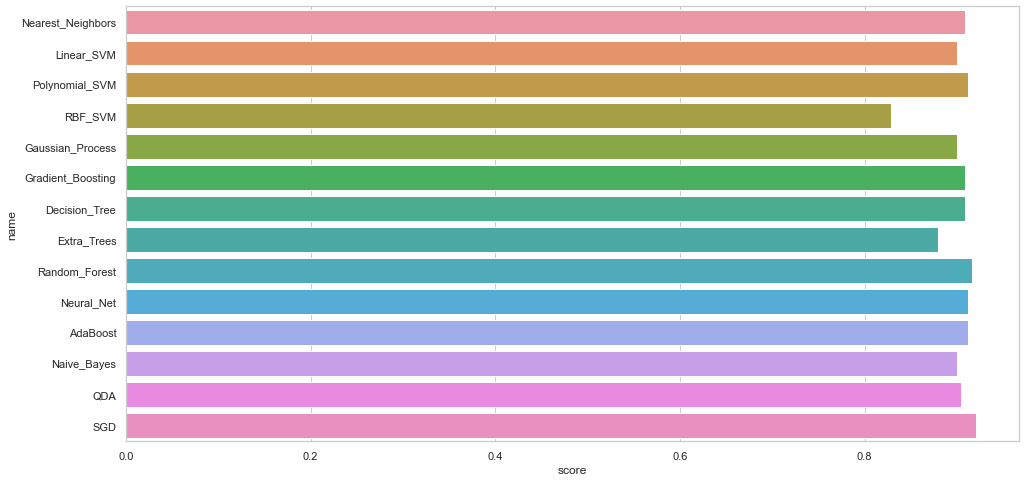

In [31]:
fig, ax = plt.subplots(figsize=(16,8))
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)